**HW 4**    
  
Monday 04/07/2025  
DS 3001 Spring 2025  
Teresa Duong  

**Building a Binary DNN Classifier**
Task:

Create (and visualize) a DNN architecture to perform a binary classification on the dataset. </br>
Validate its performance using k-fold validation.</br>
Visualize and comment on its loss curve (how the loss function evolves over the training epochs).</br>
Try out a few variants of your net and record the same information above for each – show that you’ve at least searched through various optimizers, learning rates, choices of activation function, or something similar. Try to focus on a single hyperparameter and interpret what you see.</br>
Compare the performance of your DNN classifier to the logistic regressor you built for homework 3.</br>
Do a hypothesis test of your choice (either frequentist or Bayesian) to determine which of the two is more accurate.</br>
HINT: k-fold validation creates a dataset of performance metrics.</br>

**Dataset Loading:**

,x,y,l
0,0.272207,0.672364,0
1,0.031941,2.272835,0
2,0.871286,-0.105992,0
3,1.252878,1.101521,0
4,1.884091,2.294689,0
...,...,...,...
1995,4.983404,5.559882,1
1996,4.330200,3.556687,1
1997,3.909910,3.406020,1
1998,2.474143,2.443570,1


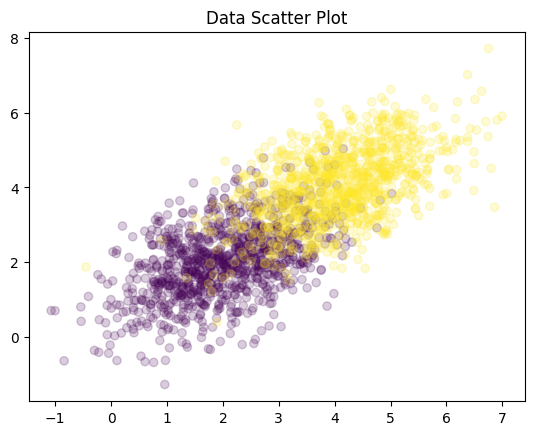

In [1]:
# Converting JSON to CSV: https://www.geeksforgeeks.org/convert-json-to-csv-in-python/
import json
import csv
import matplotlib.pyplot as plt
import numpy as np

# Open the JSON Lines file
with open('HW3.jsonl', 'r') as json_file:
    with open('HW3.csv', 'w', newline='') as data_file:
        csv_writer = csv.writer(data_file)
        count = 0
        for line in json_file:
            data = json.loads(line)
            if count == 0:
                header = data.keys()
                csv_writer.writerow(header)
                count += 1
            csv_writer.writerow(data.values())

# Convert CSV to pandas df
import pandas as pd
df = pd.read_csv('HW3.csv')
display (df)
x = df['x']
y = df['y']
# Exploratory scatter plot of the df
plt.scatter(x, y , c=df['l'], cmap='viridis', alpha = 0.2)
plt.title('Data Scatter Plot')
plt.show()
plt.close()

**Create (and visualize) a DNN architecture to perform a binary classification on the dataset. </br>
Validate its performance using k-fold validation. </br>**

c:\Users\13012\DS3001\DUONG_HW4\hw4venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


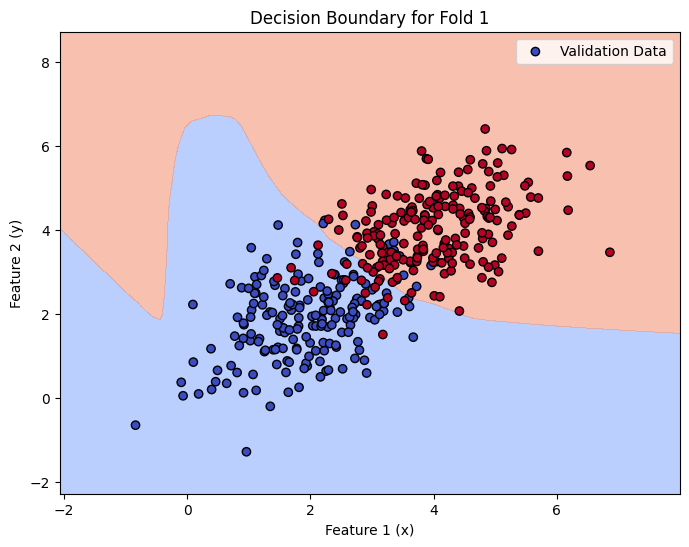

c:\Users\13012\DS3001\DUONG_HW4\hw4venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


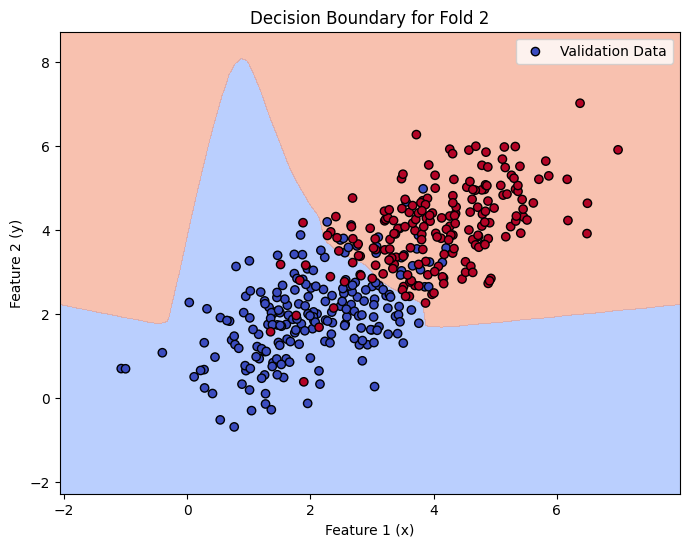

c:\Users\13012\DS3001\DUONG_HW4\hw4venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


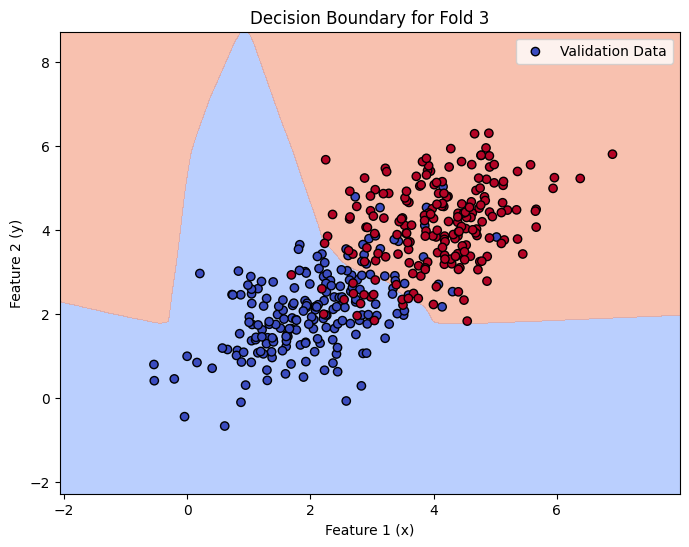

c:\Users\13012\DS3001\DUONG_HW4\hw4venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


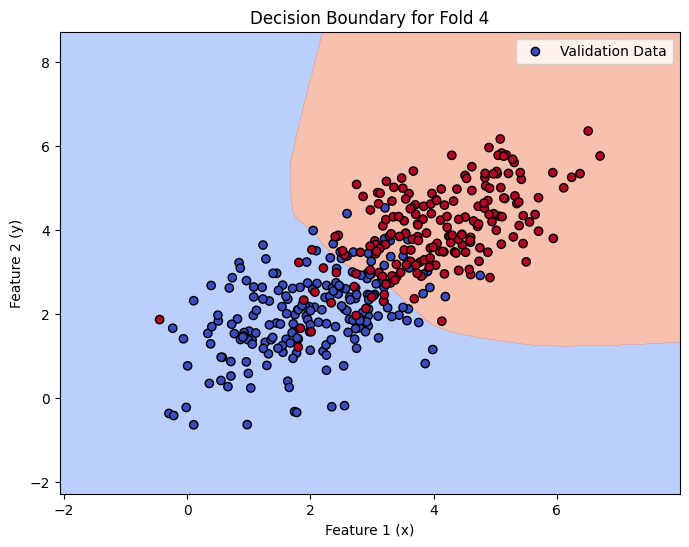

c:\Users\13012\DS3001\DUONG_HW4\hw4venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


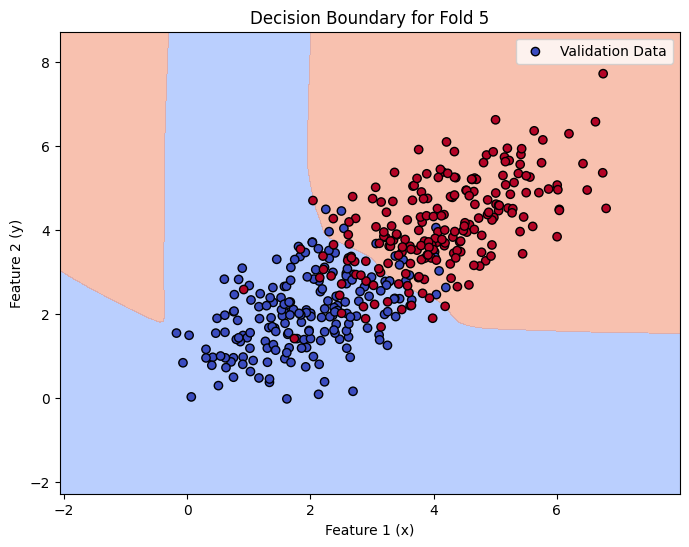

,Fold,Accuracy,Precision,Recall,F1-Score
0,1,0.9075,0.915842,0.902439,0.909091
1,2,0.8875,0.858537,0.916667,0.886650
2,3,0.8875,0.867925,0.915423,0.891041
3,4,0.8700,0.835749,0.905759,0.869347
4,5,0.8700,0.916230,0.829384,0.870647


'# Get the validation accuracy for this fold\n    val_acc = hist.history[\'val_acc\'][-1]  # Accuracy from the last epoch\n    fold_accuracies.append(val_acc)\n    print(f"Fold Validation Accuracy: {val_acc:.4f}")\n\n# Plot the training accuracy for the last fold\nplt.plot(hist.history[\'acc\'], label=\'Training Accuracy\')\nplt.plot(hist.history[\'val_acc\'], label=\'Validation Accuracy\')\nplt.title(\'Accuracy Curve (Last Fold)\')\nplt.xlabel(\'Epochs\')\nplt.ylabel(\'Accuracy\')\nplt.legend()\nplt.show()\n\n# Calculate the average accuracy across all folds\naverage_accuracy = np.mean(fold_accuracies)\nprint(f"Average Validation Accuracy: {average_accuracy:.4f}")'

In [ ]:
from sklearn.model_selection import KFold
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

x = df[['x', 'y']]  # Features
y = df['l']         # Class Labels

# Define k-fold cross-validation
k = 5  # Five folds
kf = KFold(n_splits=k, shuffle=True, random_state=1) # Shuffling before splitting
metrics_list = [] # For performance metrics

for train_index, val_index in kf.split(x):
    # Splitting data into training and validation sets
    Xtrain, Xval = x.iloc[train_index], x.iloc[val_index]
    ytrain, yval = y.iloc[train_index], y.iloc[val_index]

    # DNN Model
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(units=128, activation='relu', input_shape=[2,]), # Small batches of 128, 64, 32
        tf.keras.layers.Dense(units=64, activation='relu'), 
        tf.keras.layers.Dense(units=32, activation='relu'),
        tf.keras.layers.Dense(units=1, activation='sigmoid')  # Binary classification
    ])

    # Optimizer: Adam, Learning rate: 0.001, Loss function: Cross Entropy
    opt = tf.keras.optimizers.Adam(learning_rate= 0.001) 
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['acc'])

    # Training the model with validation data
    hist = model.fit(Xtrain, ytrain, validation_data=(Xval, yval), verbose=False, epochs=500)

    # Making predictions on the validation set
    y_pred_probs = model.predict(Xval)
    y_pred = (y_pred_probs > 0.5).astype(int)

    # Metrics for each fold
    accuracy = accuracy_score(yval, y_pred)
    precision = precision_score(yval, y_pred)
    recall = recall_score(yval, y_pred)
    f1 = f1_score(yval, y_pred)

    # Append metrics to the list
    metrics_list.append({
        'Fold': len(metrics_list) + 1,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })

    # DNN Visualization (Plotting the Decision Boundary)
    x_min, x_max = x['x'].min() - 1, x['x'].max() + 1
    y_min, y_max = x['y'].min() - 1, x['y'].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    grid_points = np.c_[xx.ravel(), yy.ravel()]

    # Predict probabilities for each point in the grid
    pred_probs = model.predict(grid_points).reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, pred_probs, levels=[0, 0.5, 1], alpha=0.6, cmap='coolwarm')  # Above 0.5 probability is Class 1, Below 0.5 probability is Class 0
    plt.scatter(Xval['x'], Xval['y'], c=yval, edgecolor='k', cmap='coolwarm', label='Validation Data')  # Validation points are plotted only
    plt.title(f'Decision Boundary for Fold {len(metrics_list)}')
    plt.xlabel('Feature 1 (x)')
    plt.ylabel('Feature 2 (y)')
    plt.legend()
    plt.show()

# Convert the list of metrics into a DataFrame
metrics_df = pd.DataFrame(metrics_list)

# Display the dataset of metrics
display(metrics_df)


**Visualize and comment on its loss curve (how the loss function evolves over the training epochs).</br>**

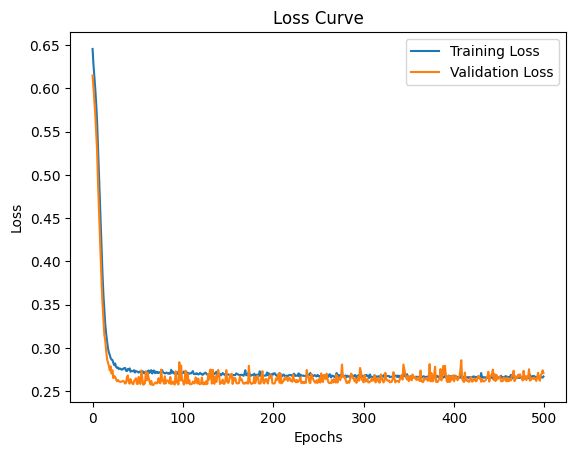

In [32]:
# Plot training and validation loss
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

 <font color ="blue">
 Interpretation: The loss function is cross-entropy since it is a binary classification problem. Over the training epochs, the loss function comes down close to around 0.27 loss and plateaus. Decreasing loss values means that the model is making better predictions, and the plateau indicates a loss value of around 0.27 is the best this model can achieve. This plateau seems to start very early on in the 500 epochs I set, so I may have to stop earlier to avoid overfitting. The training loss and validation loss curves are close, so the model seems to perform similarly on new data/validation data as it does on the training data.
 <font/>

Variant 1: Adding early stopping

c:\Users\13012\DS3001\DUONG_HW4\hw4venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


c:\Users\13012\DS3001\DUONG_HW4\hw4venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


c:\Users\13012\DS3001\DUONG_HW4\hw4venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


c:\Users\13012\DS3001\DUONG_HW4\hw4venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


c:\Users\13012\DS3001\DUONG_HW4\hw4venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


,Fold,Accuracy,Precision,Recall,F1-Score
0,1,0.9175,0.913462,0.926829,0.920097
1,2,0.8775,0.859296,0.890625,0.874680
2,3,0.8800,0.873171,0.890547,0.881773
3,4,0.8725,0.876344,0.853403,0.864721
4,5,0.8850,0.890995,0.890995,0.890995


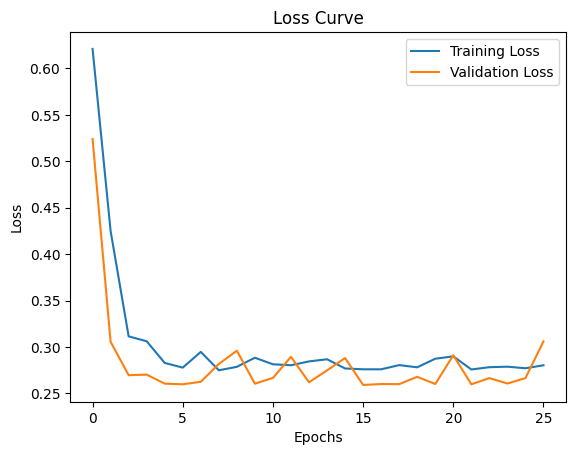

In [ ]:
# Define k-fold cross-validation
k = 5  # Five folds
kf = KFold(n_splits=k, shuffle=True, random_state=1) # Shuffling before splitting
metrics_list = [] # For performance metrics

for train_index, val_index in kf.split(x):
    # Split the data into training and validation sets
    Xtrain, Xval = x.iloc[train_index], x.iloc[val_index]
    ytrain, yval = y.iloc[train_index], y.iloc[val_index]

    # DNN model
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(units=128, activation='relu', input_shape=[2,]), # Small batches of 128, 64, 32
        tf.keras.layers.Dense(units=64, activation='relu'), 
        tf.keras.layers.Dense(units=32, activation='relu'),
        tf.keras.layers.Dense(units=1, activation='sigmoid')  # Binary classification
    ])

    # Optimizer: Adam, Learning rate: 0.001, Loss function: Cross Entropy
    opt = tf.keras.optimizers.Adam(learning_rate= 0.001) # Adam optimizer, Learning rate: 0.001 # Adjusted learning rate 0.0001 --> 0.001
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['acc']) # Cross entropy loss function
    
    # Add early stopping to stop training when validation loss stops improving
    callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # Train the model with early stopping
    hist = model.fit(Xtrain, ytrain, validation_data=(Xval, yval), verbose=False, epochs=200, callbacks=[callback])

    # Make predictions on the validation set
    y_pred_probs = model.predict(Xval)
    y_pred = (y_pred_probs > 0.5).astype(int)

    # Metrics for each fold
    accuracy = accuracy_score(yval, y_pred)
    precision = precision_score(yval, y_pred)
    recall = recall_score(yval, y_pred)
    f1 = f1_score(yval, y_pred)

    # Append metrics to the list
    metrics_list.append({
        'Fold': len(metrics_list) + 1,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })

# Convert the list of metrics into a DataFrame
metrics_df = pd.DataFrame(metrics_list)
display(metrics_df)

# Loss function
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

<font color = "blue">
Interpretation: The loss curve stops at much fewer epochs (25 compared to the 500 I set in the original model) meaning this model reaches it best performance after around 25 epochs.
<font/>

Variant 2: Learning rate increased from 0.001 --> 0.005 </br>
(Learning rate is the hyperparamater I chose to focus on.)

c:\Users\13012\DS3001\DUONG_HW4\hw4venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


c:\Users\13012\DS3001\DUONG_HW4\hw4venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


c:\Users\13012\DS3001\DUONG_HW4\hw4venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


c:\Users\13012\DS3001\DUONG_HW4\hw4venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


c:\Users\13012\DS3001\DUONG_HW4\hw4venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


,Fold,Accuracy,Precision,Recall,F1-Score
0,1,0.9150,0.901408,0.936585,0.918660
1,2,0.8700,0.868421,0.859375,0.863874
2,3,0.8925,0.876190,0.915423,0.895377
3,4,0.8750,0.881081,0.853403,0.867021
4,5,0.8850,0.887324,0.895735,0.891509


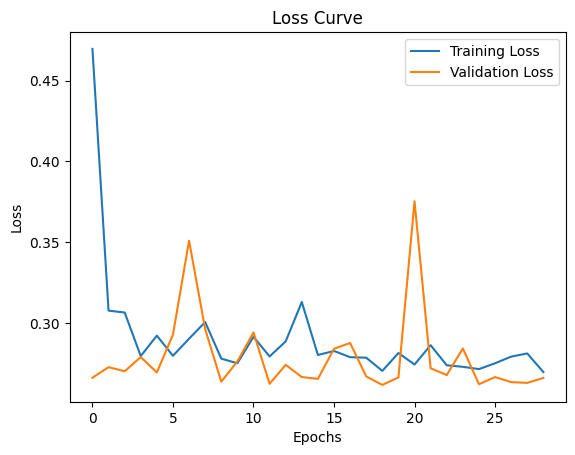

In [ ]:
# Define k-fold cross-validation
k = 5 
kf = KFold(n_splits=k, shuffle=True, random_state=1)
metrics_list = []

for train_index, val_index in kf.split(x):
    # Split the data into training and validation sets
    Xtrain, Xval = x.iloc[train_index], x.iloc[val_index]
    ytrain, yval = y.iloc[train_index], y.iloc[val_index]

    # DNN model
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(units=128, activation='relu', input_shape=[2,]), # Small batches of 128, 64, 32
        tf.keras.layers.Dense(units=64, activation='relu'), 
        tf.keras.layers.Dense(units=32, activation='relu'),
        tf.keras.layers.Dense(units=1, activation='sigmoid')  # Binary classification
    ])

    # Optimizer: Adam, Learning rate: 0.005, Loss function: Cross Entropy
    opt = tf.keras.optimizers.Adam(learning_rate= 0.005) # Adjusted learning rate 0.001 --> 0.005
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['acc']) 
    
    # Add early stopping to stop training when validation loss stops improving
    callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # Train the model with early stopping
    hist = model.fit(Xtrain, ytrain, validation_data=(Xval, yval), verbose=False, epochs=200, callbacks=[callback])

    # Make predictions on the validation set
    y_pred_probs = model.predict(Xval)
    y_pred = (y_pred_probs > 0.5).astype(int)

    # Metrics for each fold
    accuracy = accuracy_score(yval, y_pred)
    precision = precision_score(yval, y_pred)
    recall = recall_score(yval, y_pred)
    f1 = f1_score(yval, y_pred)

    # Append metrics to the list
    metrics_list.append({
        'Fold': len(metrics_list) + 1,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })

# Convert the list of metrics into a DataFrame
metrics_df = pd.DataFrame(metrics_list)
display(metrics_df)

# Loss function
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

<font color = "blue">
Interpretation: Increasing the learning rate from 0.001 to 0.005 did not improve the model. The model was less smooth with more jumps in the training and validation loss curves, meaning it was less stable in making predictions. Performance metrics also decreased a little bit from the original. In the next variant, I would try adjust the learning rate in the opposite direction to see if it can improve.
<font/>


Variant 3: Learning rate decreased from 0.001 to 0.0005

c:\Users\13012\DS3001\DUONG_HW4\hw4venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


c:\Users\13012\DS3001\DUONG_HW4\hw4venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


c:\Users\13012\DS3001\DUONG_HW4\hw4venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


c:\Users\13012\DS3001\DUONG_HW4\hw4venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


c:\Users\13012\DS3001\DUONG_HW4\hw4venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


,Fold,Accuracy,Precision,Recall,F1-Score
0,1,0.9150,0.913043,0.921951,0.917476
1,2,0.8825,0.860697,0.901042,0.880407
2,3,0.8875,0.890000,0.885572,0.887781
3,4,0.8725,0.884615,0.842932,0.863271
4,5,0.8875,0.895238,0.890995,0.893112


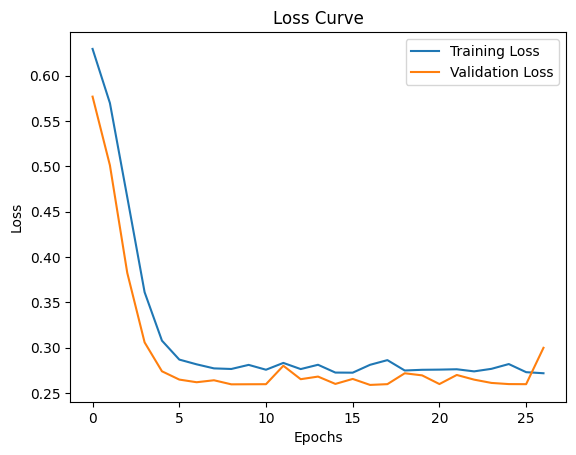

In [ ]:
# Define k-fold cross-validation
k = 5  
kf = KFold(n_splits=k, shuffle=True, random_state=1)
metrics_list = []

for train_index, val_index in kf.split(x):
    # Split the data into training and validation sets
    Xtrain, Xval = x.iloc[train_index], x.iloc[val_index]
    ytrain, yval = y.iloc[train_index], y.iloc[val_index]

    # DNN model
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(units=128, activation='relu', input_shape=[2,]), # Small batches of 128, 64, 32
        tf.keras.layers.Dense(units=64, activation='relu'), 
        tf.keras.layers.Dense(units=32, activation='relu'),
        tf.keras.layers.Dense(units=1, activation='sigmoid')  # Binary classification
    ])

    # Optimizer: Adam, Learning rate: 0.0005, Loss function: Cross Entropy
    opt = tf.keras.optimizers.Adam(learning_rate= 0.0005) # Adjusted learning rate 0.001 --> 0.0005
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['acc']) 
    
    # Add early stopping to stop training when validation loss stops improving
    callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # Train the model with early stopping
    hist = model.fit(Xtrain, ytrain, validation_data=(Xval, yval), verbose=False, epochs=200, callbacks=[callback])

    # Make predictions on the validation set
    y_pred_probs = model.predict(Xval)
    y_pred = (y_pred_probs > 0.5).astype(int)

    # Metrics for each fold
    accuracy = accuracy_score(yval, y_pred)
    precision = precision_score(yval, y_pred)
    recall = recall_score(yval, y_pred)
    f1 = f1_score(yval, y_pred)

    # Append metrics to the list
    metrics_list.append({
        'Fold': len(metrics_list) + 1,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })

# Convert the list of metrics into a DataFrame
metrics_df = pd.DataFrame(metrics_list)
display(metrics_df)

# Loss function
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

<font color = "blue">
Interpretation: Decreasing the learning rate from 0.001 to 0.0005 improved the model a little. The training and validation loss curves seem a bit smoother than Variant 2 and 1. Performance metrics seemed slightly higher in some areas while slightly lower in others, so I would try to continue decreasing the learning rate in another variant for a greater difference.
<font />

Variant 4: Decreasing learning rate from 0.0005 to 0.0001

c:\Users\13012\DS3001\DUONG_HW4\hw4venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


c:\Users\13012\DS3001\DUONG_HW4\hw4venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


c:\Users\13012\DS3001\DUONG_HW4\hw4venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


c:\Users\13012\DS3001\DUONG_HW4\hw4venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


c:\Users\13012\DS3001\DUONG_HW4\hw4venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


,Fold,Accuracy,Precision,Recall,F1-Score
0,1,0.9125,0.912621,0.917073,0.914842
1,2,0.8750,0.869792,0.869792,0.869792
2,3,0.8850,0.885572,0.885572,0.885572
3,4,0.8700,0.879781,0.842932,0.860963
4,5,0.8825,0.894231,0.881517,0.887828


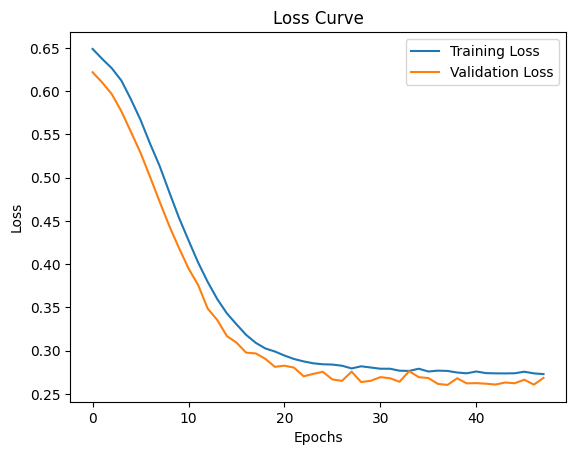

In [ ]:
# Define k-fold cross-validation
k = 5  
kf = KFold(n_splits=k, shuffle=True, random_state=1)
metrics_list = []

for train_index, val_index in kf.split(x):
    # Split the data into training and validation sets
    Xtrain, Xval = x.iloc[train_index], x.iloc[val_index]
    ytrain, yval = y.iloc[train_index], y.iloc[val_index]

    # DNN model
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(units=128, activation='relu', input_shape=[2,]), # Small batches of 128, 64, 32
        tf.keras.layers.Dense(units=64, activation='relu'), 
        tf.keras.layers.Dense(units=32, activation='relu'),
        tf.keras.layers.Dense(units=1, activation='sigmoid')  # Binary classification
    ])

    # Optimizer: Adam, Learning rate: 0.0001, Loss function: Cross Entropy
    opt = tf.keras.optimizers.Adam(learning_rate= 0.0001) # Adjusted learning rate 0.0005 --> 0.0001
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['acc']) 
    
    # Add early stopping to stop training when validation loss stops improving
    callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # Train the model with early stopping
    hist = model.fit(Xtrain, ytrain, validation_data=(Xval, yval), verbose=False, epochs=200, callbacks=[callback])

    # Make predictions on the validation set
    y_pred_probs = model.predict(Xval)
    y_pred = (y_pred_probs > 0.5).astype(int)

    # Metrics for each fold
    accuracy = accuracy_score(yval, y_pred)
    precision = precision_score(yval, y_pred)
    recall = recall_score(yval, y_pred)
    f1 = f1_score(yval, y_pred)

    # Append metrics to the list
    metrics_list.append({
        'Fold': len(metrics_list) + 1,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })

# Convert the list of metrics into a DataFrame
metrics_df = pd.DataFrame(metrics_list)
display(metrics_df)

# Loss function
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

<font color ='blue'>
Interpretation: Decreasing the learning rate continued to slightly improve the model by smoothing the loss curves and slightly improving the performance metrics. In the next variants, I would continue to decrease the learning rate until it seems to no longer improve the model.
<font/>

Variant 5: Decreasing learning rate from 0.0001 to 0.00005

c:\Users\13012\DS3001\DUONG_HW4\hw4venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


c:\Users\13012\DS3001\DUONG_HW4\hw4venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


c:\Users\13012\DS3001\DUONG_HW4\hw4venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


c:\Users\13012\DS3001\DUONG_HW4\hw4venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


c:\Users\13012\DS3001\DUONG_HW4\hw4venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


,Fold,Accuracy,Precision,Recall,F1-Score
0,1,0.9175,0.913462,0.926829,0.920097
1,2,0.8775,0.866667,0.880208,0.873385
2,3,0.8850,0.889447,0.880597,0.885000
3,4,0.8750,0.877005,0.858639,0.867725
4,5,0.8850,0.898551,0.881517,0.889952


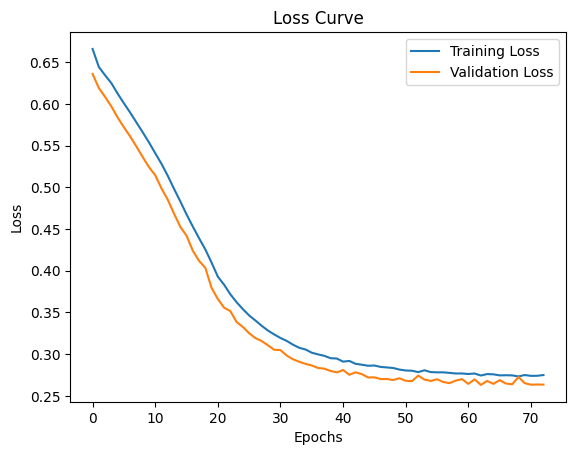

In [ ]:
# Define k-fold cross-validation
k = 5  
kf = KFold(n_splits=k, shuffle=True, random_state=1)
metrics_list = []


for train_index, val_index in kf.split(x):
    # Split the data into training and validation sets
    Xtrain, Xval = x.iloc[train_index], x.iloc[val_index]
    ytrain, yval = y.iloc[train_index], y.iloc[val_index]

    # DNN model
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(units=128, activation='relu', input_shape=[2,]), # Small batches of 128, 64, 32
        tf.keras.layers.Dense(units=64, activation='relu'), 
        tf.keras.layers.Dense(units=32, activation='relu'),
        tf.keras.layers.Dense(units=1, activation='sigmoid')  # Binary classification
    ])

    # Optimizer: Adam, Learning rate: 0.00005, Loss function: Cross Entropy
    opt = tf.keras.optimizers.Adam(learning_rate= 0.00005) # Adjusted learning rate 0.0001 --> 0.00005
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['acc']) 
    
    # Add early stopping to stop training when validation loss stops improving
    callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # Train the model with early stopping
    hist = model.fit(Xtrain, ytrain, validation_data=(Xval, yval), verbose=False, epochs=200, callbacks=[callback])

    # Make predictions on the validation set
    y_pred_probs = model.predict(Xval)
    y_pred = (y_pred_probs > 0.5).astype(int)

    # Metrics for each fold
    accuracy = accuracy_score(yval, y_pred)
    precision = precision_score(yval, y_pred)
    recall = recall_score(yval, y_pred)
    f1 = f1_score(yval, y_pred)

    # Append metrics to the list
    metrics_list.append({
        'Fold': len(metrics_list) + 1,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })

# Convert the list of metrics into a DataFrame
metrics_df = pd.DataFrame(metrics_list)
display(metrics_df)

# Loss function
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

<font color = 'blue'>
Interpretation: Decreasing the learning rate continued to smoothe the model loss curves and result in low loss values at the end of training. The validation and training loss curves are close indicating the model performs similar on the two sets.
<font/>

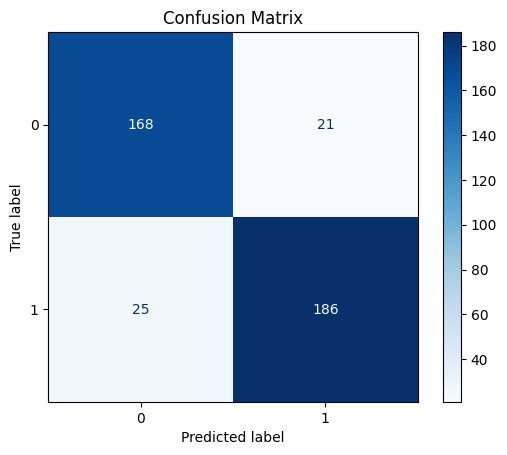

Accuracy: 0.89
Precision: 0.90
Recall: 0.88
F1-Score: 0.89


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score

# Confusion Matrix
cm = confusion_matrix(yval, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# Performance Metrics
accuracy = accuracy_score(yval, y_pred)
precision = precision_score(yval, y_pred)
recall = recall_score(yval, y_pred)
f1 = f1_score(yval, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Variant 6: Decreasing the learning rate from 0.00005 to 0.00001

c:\Users\13012\DS3001\DUONG_HW4\hw4venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


c:\Users\13012\DS3001\DUONG_HW4\hw4venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


c:\Users\13012\DS3001\DUONG_HW4\hw4venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


c:\Users\13012\DS3001\DUONG_HW4\hw4venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


c:\Users\13012\DS3001\DUONG_HW4\hw4venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step


,Fold,Accuracy,Precision,Recall,F1-Score
0,1,0.9025,0.902913,0.907317,0.905109
1,2,0.8700,0.839806,0.901042,0.869347
2,3,0.8575,0.846154,0.875622,0.860636
3,4,0.8600,0.826087,0.895288,0.859296
4,5,0.8925,0.903846,0.890995,0.897375


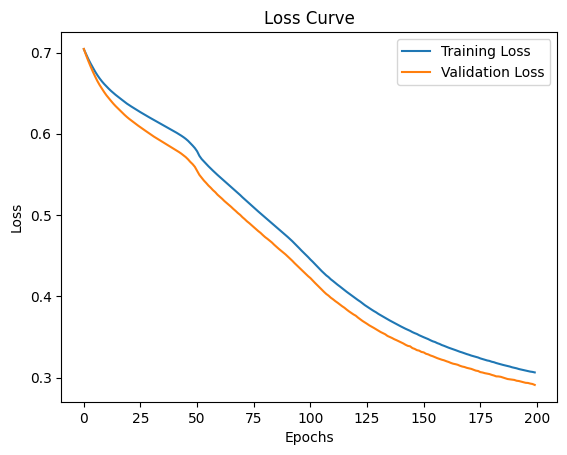

In [ ]:
# Define k-fold cross-validation
k = 5  
kf = KFold(n_splits=k, shuffle=True, random_state=1)
metrics_list = []

for train_index, val_index in kf.split(x):
    # Split the data into training and validation sets
    Xtrain, Xval = x.iloc[train_index], x.iloc[val_index]
    ytrain, yval = y.iloc[train_index], y.iloc[val_index]

    # DNN model
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(units=128, activation='relu', input_shape=[2,]), # Small batches of 128, 64, 32
        tf.keras.layers.Dense(units=64, activation='relu'), 
        tf.keras.layers.Dense(units=32, activation='relu'),
        tf.keras.layers.Dense(units=1, activation='sigmoid')  # Binary classification
    ])

    # Optimizer: Adam, Learning rate: 0.00001, Loss function: Cross Entropy
    opt = tf.keras.optimizers.Adam(learning_rate= 0.00001) # Adjusted learning rate 0.00005 --> 0.00001
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['acc']) 
    
    # Add early stopping to stop training when validation loss stops improving
    callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # Train the model with early stopping
    hist = model.fit(Xtrain, ytrain, validation_data=(Xval, yval), verbose=False, epochs=200, callbacks=[callback])

    # Make predictions on the validation set
    y_pred_probs = model.predict(Xval)
    y_pred = (y_pred_probs > 0.5).astype(int)

    # Metrics for each fold
    accuracy = accuracy_score(yval, y_pred)
    precision = precision_score(yval, y_pred)
    recall = recall_score(yval, y_pred)
    f1 = f1_score(yval, y_pred)

    # Append metrics to the list
    metrics_list.append({
        'Fold': len(metrics_list) + 1,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })

# Convert the list of metrics into a DataFrame
metrics_df = pd.DataFrame(metrics_list)
display(metrics_df)

# Loss function
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

<font color = 'blue'>
Interpretation: Decreasing the learning rate no longer seemed to improve the model at a learning rate of 0.00001. The loss curves appear to end at a higher loss value (around 0.3) compared to the previous learning rates (around 0.27). Performance metrics seemed slightly lower as well. This led me to using the previous variant, Variant 5, as the final model version to use in the comparison portion of the assignment below.
<font/>

**Compare the performance of your DNN classifier to the logistic regressor you built for homework 3.</br>
Do a hypothesis test of your choice (either frequentist or Bayesian) to determine which of the two is more accurate.</br>
HINT: k-fold validation creates a dataset of performance metrics.</br>**

HW 3 Logistic Regressor:

Accuracy = 0.905
Precision = 0.9154228855721394
Recall = 0.8975609756097561
F1-Score = 0.9064039408866995


c:\Users\13012\DS3001\DUONG_HW4\hw4venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


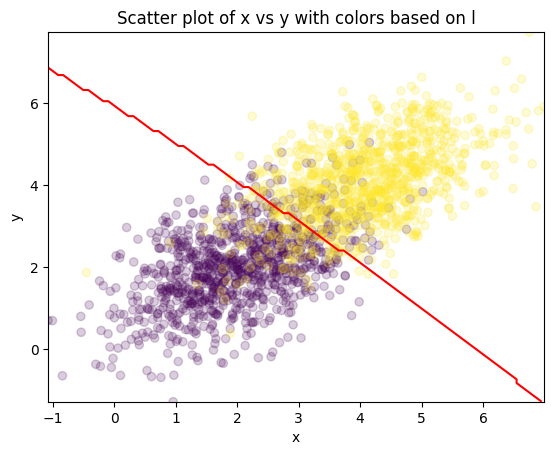

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Classification Model
x = df[['x', 'y']]  # Features
y = df['l']         # Labels

# 100-fold validation (80/20 train/test split)
# Train test split: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
Xtrain, Xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=1)

# 'fit' the model
model = GaussianNB()
model.fit(Xtrain, ytrain)

# Use the model to predict the class of the test sample
y_model = model.predict(Xtest)

# Accuracy Score
accuracy = accuracy_score(ytest, y_model)
print("Accuracy =", accuracy)

# Other Model Metrics: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html
from sklearn.metrics import precision_recall_fscore_support
precision, recall, f1_score, support = precision_recall_fscore_support(ytest, y_model, average='binary')

print(f"Precision = {precision}")
print(f"Recall = {recall}")
print(f"F1-Score = {f1_score}")

# Scatterplot of x vs y with colors based on l
plt.scatter(df['x'], df['y'], c=df['l'], cmap='viridis', alpha=0.2)
plt.title('Scatter plot of x vs y with colors based on l')
plt.xlabel('x')
plt.ylabel('y')

# Means and variances of the features for each class
means = model.theta_
variances = model.var_

# Decision boundary visualization
# I wasn't sure how to visualize the decision boundary from the lectures and couldn't make an office hour this week, so I relied mostly on GenAI to produce this: 
x_vals = np.linspace(x['x'].min(), x['x'].max(), 100)
y_vals = np.linspace(x['y'].min(), x['y'].max(), 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = model.predict(np.c_[X.ravel(), Y.ravel()])
Z = Z.reshape(X.shape)
plt.contour(X, Y, Z, levels=[0.5], colors='red')

plt.show()
plt.close()

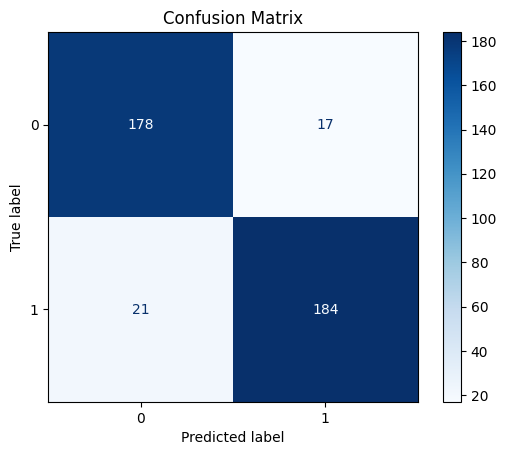

Accuracy: 0.91
Precision: 0.92
Recall: 0.90
F1-Score: 0.91


In [ ]:
# Predictions on Test Data
y_pred_probs = model.predict(Xtest)  # Predicted probabilities
y_pred = (y_pred_probs > 0.5).astype(int)  # Convert probabilities to binary class labels

# Confusion Matrix
cm = confusion_matrix(ytest, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# Performance metrics
accuracy = accuracy_score(ytest, y_pred)
precision = precision_score(ytest, y_pred)
recall = recall_score(ytest, y_pred)
f1 = f1_score(ytest, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Frequentist Hypothesis Testing:

In [41]:
import math
from scipy import stats

# Significance level
significance_level = 0.05

# DNN model
correct_dnn = (168+186)  # Number of correct predictions by DNN
total_dnn = (168+21+25+186)   # Total predictions by DNN
accuracy_dnn = correct_dnn / total_dnn

# Logistic Regression model
correct_logreg = (178 + 184)  # Number of correct predictions by Logistic Regressor
total_logreg = (178+184+21+17)   # Total predictions by Logistic Regressor
accuracy_logreg = correct_logreg / total_logreg

# Pooled accuracy
pooled_p = (correct_dnn + correct_logreg) / (total_dnn + total_logreg)

# Standard error
standard_error = math.sqrt(pooled_p * (1 - pooled_p) * (1/total_dnn + 1/total_logreg))

# Z-statistic
z_statistic = (accuracy_dnn - accuracy_logreg) / standard_error

# Two-tailed p-value
p_value_two_tailed = 2 * (1 - stats.norm.cdf(abs(z_statistic)))

# One-tailed p-value
p_value_one_tailed = 1 - stats.norm.cdf(z_statistic)

# Print results
print("Two-Tailed Test:")
print("Z-Statistic =", z_statistic)
print("P-Value =", p_value_two_tailed)
if p_value_two_tailed < significance_level:
    print("Reject the null hypothesis. There is a significant difference in model accuracies.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in model accuracies.")

print("\nOne-Tailed Test:")
print("Z-Statistic =", z_statistic)
print("P-Value =", p_value_one_tailed)
if p_value_one_tailed < significance_level:
    print("Reject the null hypothesis. The DNN model has significantly higher accuracy.")
else:
    print("Fail to reject the null hypothesis. The Logistic Regressor model does not have significantly higher accuracy.")

Two-Tailed Test:
Z-Statistic = -0.9226539095268055
P-Value = 0.35618759214538764
Fail to reject the null hypothesis. There is no significant difference in model accuracies.

One-Tailed Test:
Z-Statistic = -0.9226539095268055
P-Value = 0.8219062039273062
Fail to reject the null hypothesis. The Logistic Regressor model does not have significantly higher accuracy.


<font color ="blue">
Interpretation: While the Logistic Regressor model predicted slightly more of its data correctly, there was no significant dfference in its accuracy and the DNN model's accuracy according to this frequentist hypothesis test.
<font/>